# Fourier Transform

Teng-Jui Lin

Content adapted from UW AMATH 301, Beginning Scientific Computing. Although not covered in Spring 2020, the topic is presented in previous years: (1) [Theory of the Fourier Transform](https://www.youtube.com/watch?v=YOWLoNQDFsk), (2) [Discrete Fourier Transform (DFT) and the Fast Fourier Transform (FFT)](https://www.youtube.com/watch?v=1tx0LPJowMo), (3) [FFT and image compression](https://www.youtube.com/watch?v=L9T3jNbCYf8).

- Theory of Fourier Transform
    - Discrete Fourier transform
    - Fast Fourier transform
    - Power spectral density
- Applications of Fourier transform
    - Noise filtering
    - Image compression
- `numpy` implementation
    - Fast Fourier transform [`numpy.fft.fft()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)
    - Inverse fast Fourier transform [`numpy.fft.ifft()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html)
    - Frequency of fft [`numpy.fft.fftfreq()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html)
    - 2D fast Fourier transform [`numpy.fft.fft2()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html)

## Fourier transform and power spectrum
### Discrete Fourier transform

The discrete Fourier transform (DFT) transforms a data point $f_n$ into a frequency coefficient $\hat{f}_{k}$ using

$$
\hat{f}_k = \sum_{n=0}^{N-1} f_n e^{2\pi i kn / N}
$$

where sine waves of different frequencies are added together. The inverse discrete Fourier transform (iDFT) uses

$$
f_n = \dfrac{1}{N} \sum_{k=0}^{N-1} \hat{f}_k e^{-2\pi ikn/N}
$$

to transform the frequency coefficient back to data point.

For a set of data points $\{f_0, f_1, \dots, f_{N-1}\}$, the DFT that transforms the data points to  into frequency coefficients $\{\hat{f}_0, \hat{f}_1, \dots, \hat{f}_{N-1}\}$ is represented by

$$
\mathbf{\hat{f}_k = F f_n}
$$

where

$$
\mathbf{\hat{f}_k} =
\begin{bmatrix}
\hat{f}_0 \\ \hat{f}_1 \\ \hat{f}_2 \\ \vdots \\ \hat{f}_{N-1}
\end{bmatrix},
\mathbf{F} =
\begin{bmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & \omega_N & \omega_N^2 & \cdots & \omega_N^{N-1} \\
1 & \omega_N^2 & \omega_N^4 & \cdots & \omega_N^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega_N^{N-1} & \omega_N^{2(N-1)} & \cdots & \omega_N^{(N-1)^2} \\
\end{bmatrix},
\mathbf{f_n} =
\begin{bmatrix}
f_0 \\ f_1 \\ f_2 \\ \vdots \\ f_{N-1}
\end{bmatrix}，
$$


and $\omega_N = e^{2\pi i/N}$.

DFT has an order of $\mathcal{O}(n^2)$ because of matrix multiplication.

### Fast Fourier transform

Fast Fourier transform (FFT) computes the same thing as the DFT, but it has a more advantageous order of $\mathcal{O}(n \log n)$ given a dataset with $N$ samples, where $N$ is a power of 2.

Suppose we have a sample with $N = 1024$, the FFT gives

$$
\mathbf{\hat{x}_k = F_{1024} x}
$$

where

$$
\mathbf{\hat{x}} =
\begin{bmatrix}
\mathbf{I} & \mathbf{-D} \\
\mathbf{I} & \mathbf{-D}
\end{bmatrix}
\begin{bmatrix}
\mathbf{F_{512}} & \mathbf{0} \\
\mathbf{0} & \mathbf{F_{512}}
\end{bmatrix}
\begin{bmatrix}
\mathbf{x}_{\mathrm{even}} \\
\mathbf{x}_{\mathrm{odd}}
\end{bmatrix}
$$

and

$$
\mathbf{D} =
\begin{bmatrix}
1 \\
& \omega_N \\
& & \omega_N^2 \\
& & & \ddots \\
& & & & \omega_N^{N-1} \\
\end{bmatrix}
$$

so that the computation time is cut for those zero entries. The vector is sorted for even and odd entries, and the first matrix reshuffles them back. We can keep decompose the matrix recursively so that $\mathbf{F_{1024} \to F_{512} \to \cdots \to F_{2}}$, saving a lot of computations.

Even if $N$ is not a power of 2, we can pad zeros to the samples until it reaches to a power of 2: $\begin{bmatrix}\mathbf{x} \\\mathbf{0}\end{bmatrix}$.

### Implementation and power spectrum

Here, we use [`numpy.fft.fft()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html) command to perform FFT.

**Problem Statement.** Consider a wave function

$$
f(t) = \sin(2\pi \omega_1 t) + \sin(2\pi \omega_2 t),
$$

where $\omega_1 = 50 \ \mathrm{Hz}$ and $\omega_2 = 120 \ \mathrm{Hz}$.

(a) Determine the FFT on the wave function $f(x)$, denoted $\mathbf{\hat{f}}$, using samples from times $t \in [0, 1] \ \mathrm{s}$ with sampling interval 0.001 s.

(b) Plot the power spectral density at the first half of points that is defined as $\dfrac{\Vert\mathbf{\hat{f}}\Vert^2}{N}$ vs frequency defined by $\dfrac{k}{N}$, where $k = 0, 1, 2, \dots, \frac{N}{2}$. Hint: use [`numpy.fft.fftfreq()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define time interval
dt = 0.001
t_initial = 0
t_final = 1
t = np.arange(t_initial, t_final+dt/2, dt)
t_len = len(t)

In [3]:
# define wave function and calculate values
omega1 = 50
omega2 = 120
wave_func = lambda t : np.sin(2*np.pi*omega1*t) + np.sin(2*np.pi*omega2*t)
y_original = wave_func(t)

In [4]:
# perform fft, calculate power spectral density and frequency
y_fft = np.fft.fft(y_original)
PSD = (np.abs(y_fft)**2/t_len) # only need the first half, second half has same info
freq = np.fft.fftfreq(t_len, d=dt)

In [5]:
# plot settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14
})

Text(0.5, 1.0, 'Wave function')

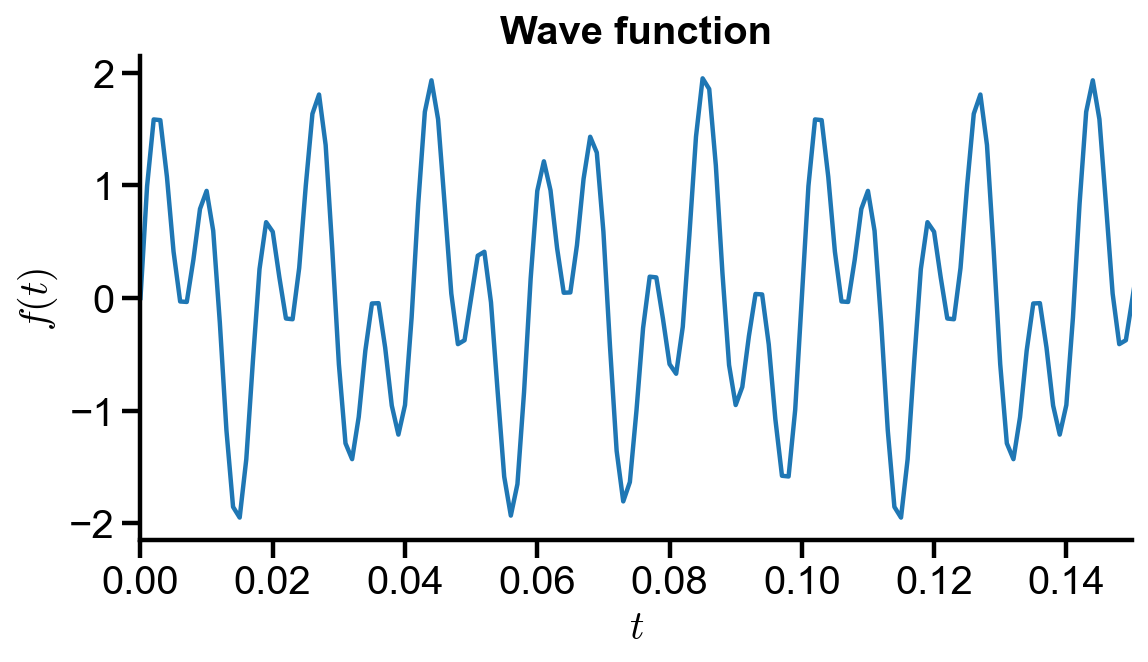

In [6]:
# plot wave function
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t, y_original)
ax.set_xlim(t_initial, 0.15)
ax.set_xlabel('$t$')
ax.set_ylabel('$f(t)$')
ax.set_title('Wave function')

Text(0.5, 1.0, 'Power Spectrum')

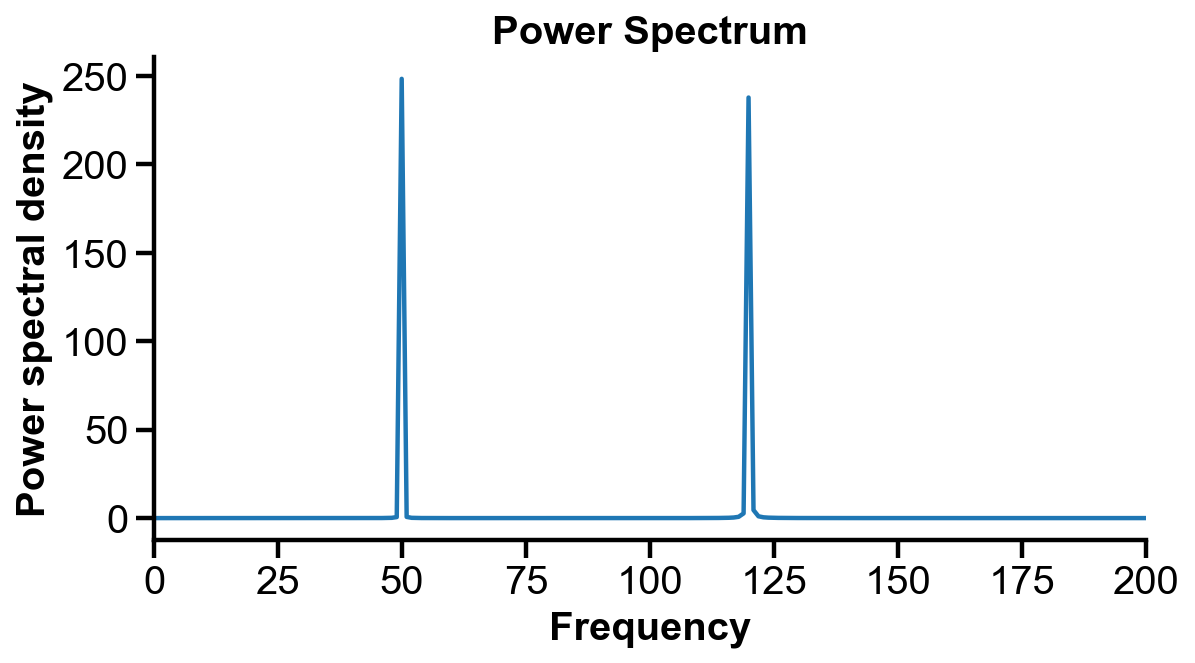

In [7]:
# plot power spectrum
fig, ax = plt.subplots(figsize=(8, 4))
half_t_len = int(np.floor(t_len/2))+1
ax.plot(freq[:half_t_len], PSD[:half_t_len])
ax.set_xlim(0, 200)
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectral density')
ax.set_title('Power Spectrum')

The power spectral density shows peaks at 50 Hz and 120 Hz, which is exactly the frequencies of the wave function.

## FFT and noise filtering

Here, we use [`numpy.fft.ifft()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html) command to perform iFFT. We use the following process to filter noise:

$$
\mathbf{f}_{\text{noisy}} \xrightarrow{\mathrm{FFT}} \mathbf{\hat{f}}_{\text{noisy}} \xrightarrow{\mathrm{threshold}} \mathbf{\hat{f}}_{\text{filtered}}\xrightarrow{\mathrm{iFFT}} \mathbf{f}_{\text{filtered}}
$$

**Problem Statement.** Consider a wave function

$$
f(t) = \sin(2\pi \omega_1 t) + \sin(2\pi \omega_2 t) + \sin(2\pi \omega_3 t),
$$

where $\omega_1 = 70 \ \mathrm{Hz}$, $\omega_2 = 100 \ \mathrm{Hz}$, and $\omega_3 = 190 \ \mathrm{Hz}$.

(a) Create a noisy function $f_{\mathrm{noisy}}(x)$ by adding a large noise to the function.

(b) Determine the FFT on the wave function $f_{\mathrm{noisy}}(x)$, denoted $\mathbf{\hat{f}_{\mathrm{noisy}}}$, using samples from times $t \in [0, 1] \ \mathrm{s}$ with sampling interval 0.001 s.

(c) Plot the power spectral density (PSD) of $\mathbf{\hat{f}_{\mathrm{noisy}}}$. Filter the PSD with appropriate threshold so that only the main frequencies are kept.

(d) Use the filter for the PSD to filter $\mathbf{\hat{f}_{\mathrm{noisy}}}$, giving $\mathbf{\hat{f}_{\mathrm{filtered}}}$. Use iFFT to transform $\mathbf{\hat{f}_{\mathrm{filtered}}}$ back to data points and plot with the original function and the noisy function.

In [8]:
# define time interval
dt = 0.001
t_initial = 0
t_final = 1
t = np.arange(t_initial, t_final+dt/2, dt)
t_len = len(t)

In [9]:
# define wave function and calculate values
omega1 = 70
omega2 = 100
omega3 = 190
wave_func = lambda t : np.sin(2*np.pi*omega1*t) + np.sin(2*np.pi*omega2*t) + np.sin(2*np.pi*omega3*t)
y_original = wave_func(t)

In [10]:
# define noidywave function and calculate values
np.random.seed(1)
wave_func_noisy = lambda t : np.sin(2*np.pi*omega1*t) + np.sin(2*np.pi*omega2*t) + np.sin(2*np.pi*omega3*t) + 2.5*np.random.randn(t_len)
y_noisy = wave_func_noisy(t)

In [11]:
# perform fft, calculate power spectral density and frequency
y_noisy_fft = np.fft.fft(y_noisy)
PSD = (np.abs(y_noisy_fft)**2/t_len)
freq = np.fft.fftfreq(t_len, d=dt)

In [12]:
# threshold power spectral density
threshold = 50
threshold_mask = PSD > threshold
PSD_thresholded = PSD * threshold_mask

In [13]:
# filter fft, then ifft
y_filtered_fft = y_noisy_fft * threshold_mask
y_filtered = np.fft.ifft(y_filtered_fft)

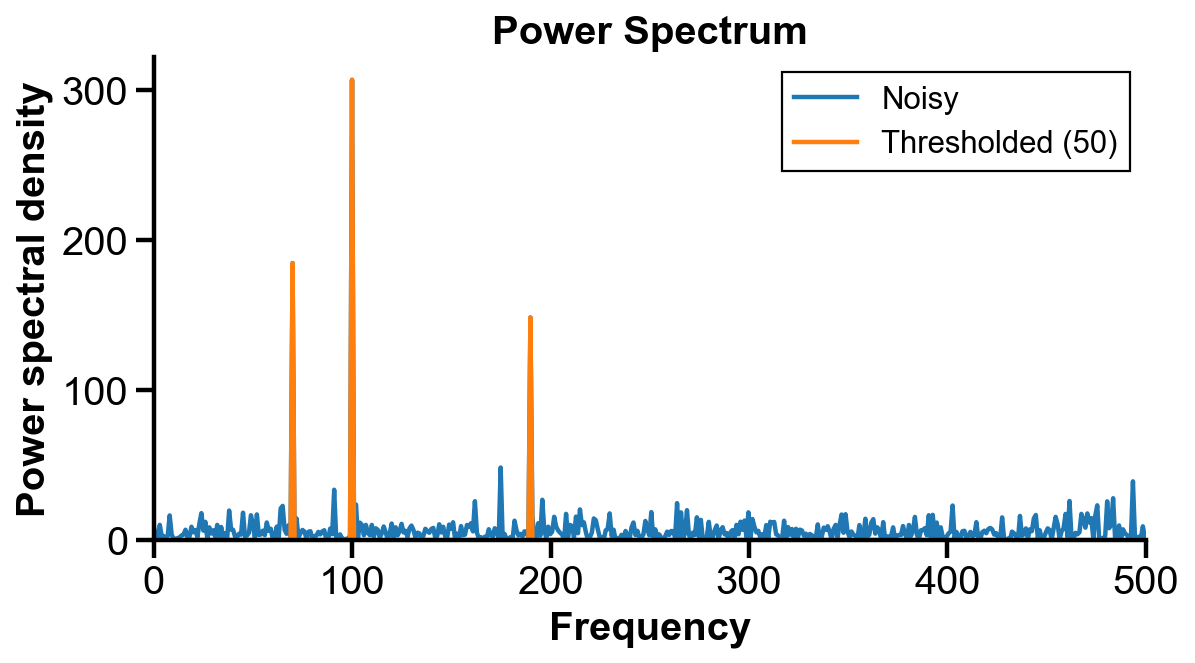

In [14]:
# plot power spectrum
fig, ax = plt.subplots(figsize=(8, 4))
half_t_len = int(np.floor(t_len/2))+1
ax.plot(freq[:half_t_len], PSD[:half_t_len], label='Noisy')
ax.plot(freq[:half_t_len], PSD_thresholded[:half_t_len], label=f'Thresholded ({threshold})')
ax.set_xlim(0, 500)
ax.set_ylim(0)
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectral density')
ax.set_title('Power Spectrum')
ax.legend()

C:\Softwares\Anaconda\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


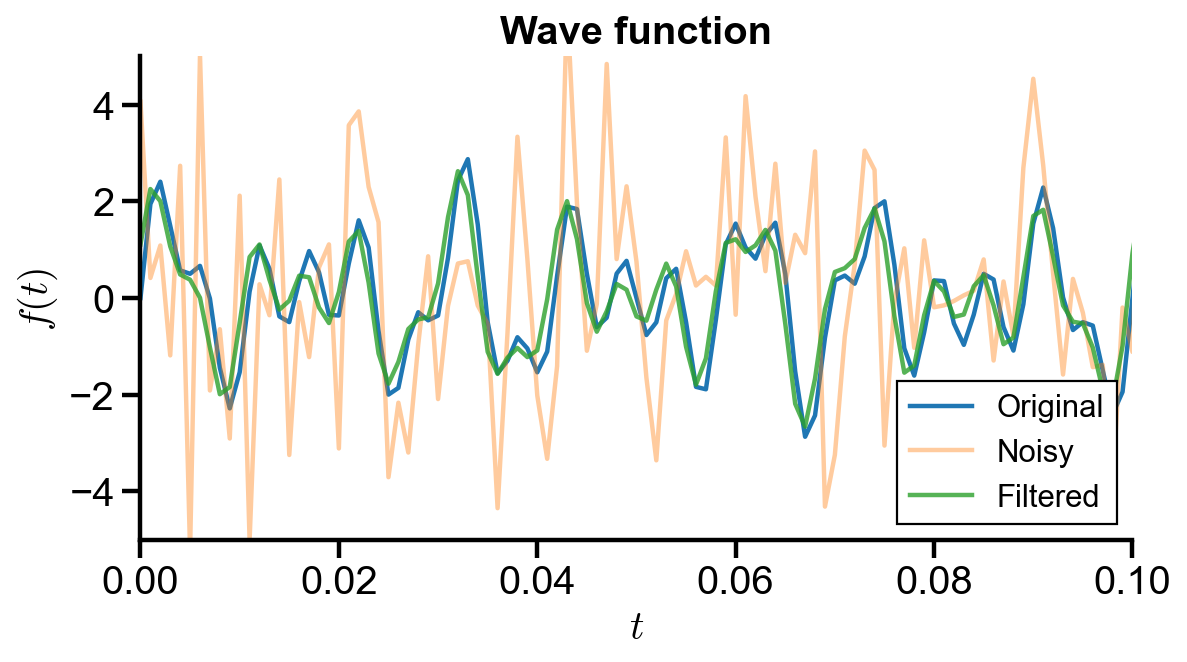

In [15]:
# plot wave function
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t, y_original, label='Original')
ax.plot(t, y_noisy, alpha=0.4, label='Noisy')
ax.plot(t, y_filtered, alpha=0.8, label='Filtered')
ax.set_xlim(t_initial, 0.1)
ax.set_ylim(-5, 5)
ax.set_xlabel('$t$')
ax.set_ylabel('$f(t)$')
ax.set_title('Wave function')
ax.legend()

## FFT and image compression

**Problem Statement.** Import the given image `dog.jpg`.

(a) Using [`numpy.fft.fft2()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html), FFT the image and plot the coefficient space.

(b) Threshold the FFT and transform back using iFFT. Compute the compression rate and plot with the image.

(c) Compare different compression rates with the original image.

(d) Compare the original and compressed image in a 3D intensity plot.

### Import image

In [16]:
import skimage
from skimage import io

In [17]:
img = io.imread('dog.jpg')
gray_img = skimage.color.rgb2gray(img)
gray_img.shape

(327, 327)

(-0.5, 326.5, 326.5, -0.5)

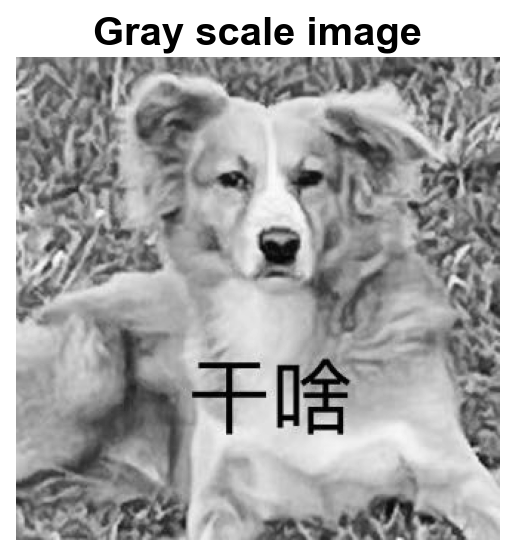

In [18]:
# plot original img
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(gray_img, cmap='gray')
ax.set_title('Gray scale image')
ax.axis('off')

### Coefficient space and compression

In [19]:
# fft and coeff space
gray_img_fft = np.fft.fft2(gray_img)
coeff_space = np.log(abs(np.fft.fftshift(gray_img_fft))+1)

(-0.5, 326.5, 326.5, -0.5)

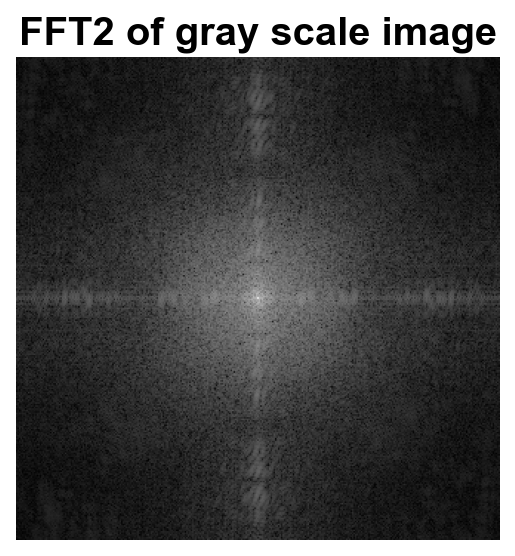

In [20]:
# plot coeff space
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(coeff_space, cmap='gray')
ax.set_title('FFT2 of gray scale image')
ax.axis('off')

In [21]:
# threshold and ifft
threshold = 1e-5 * 100
threshold_mask = abs(gray_img_fft) > threshold*np.max(abs(gray_img_fft))
gray_img_thr_fft = gray_img_fft * threshold_mask
gray_img_thr = abs(np.fft.ifft2(gray_img_thr_fft))

In [22]:
compression_rate = np.sum(threshold_mask) / (np.prod(gray_img.shape))

(-0.5, 326.5, 326.5, -0.5)

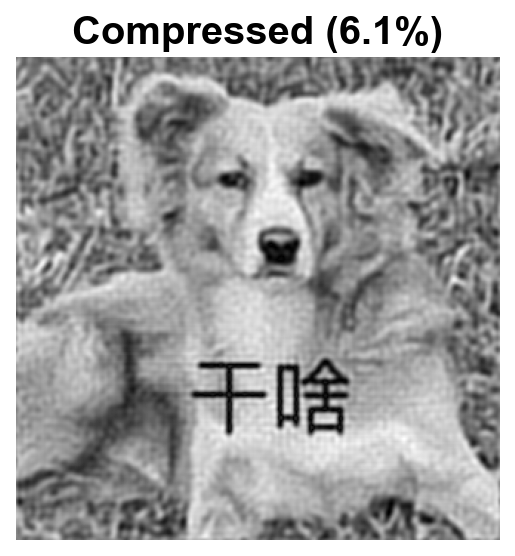

In [23]:
# plot compressed img
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(gray_img_thr, cmap='gray')
ax.set_title(f'Compressed ({compression_rate*100 :.1f}%)')
ax.axis('off')

### Comparing compression results

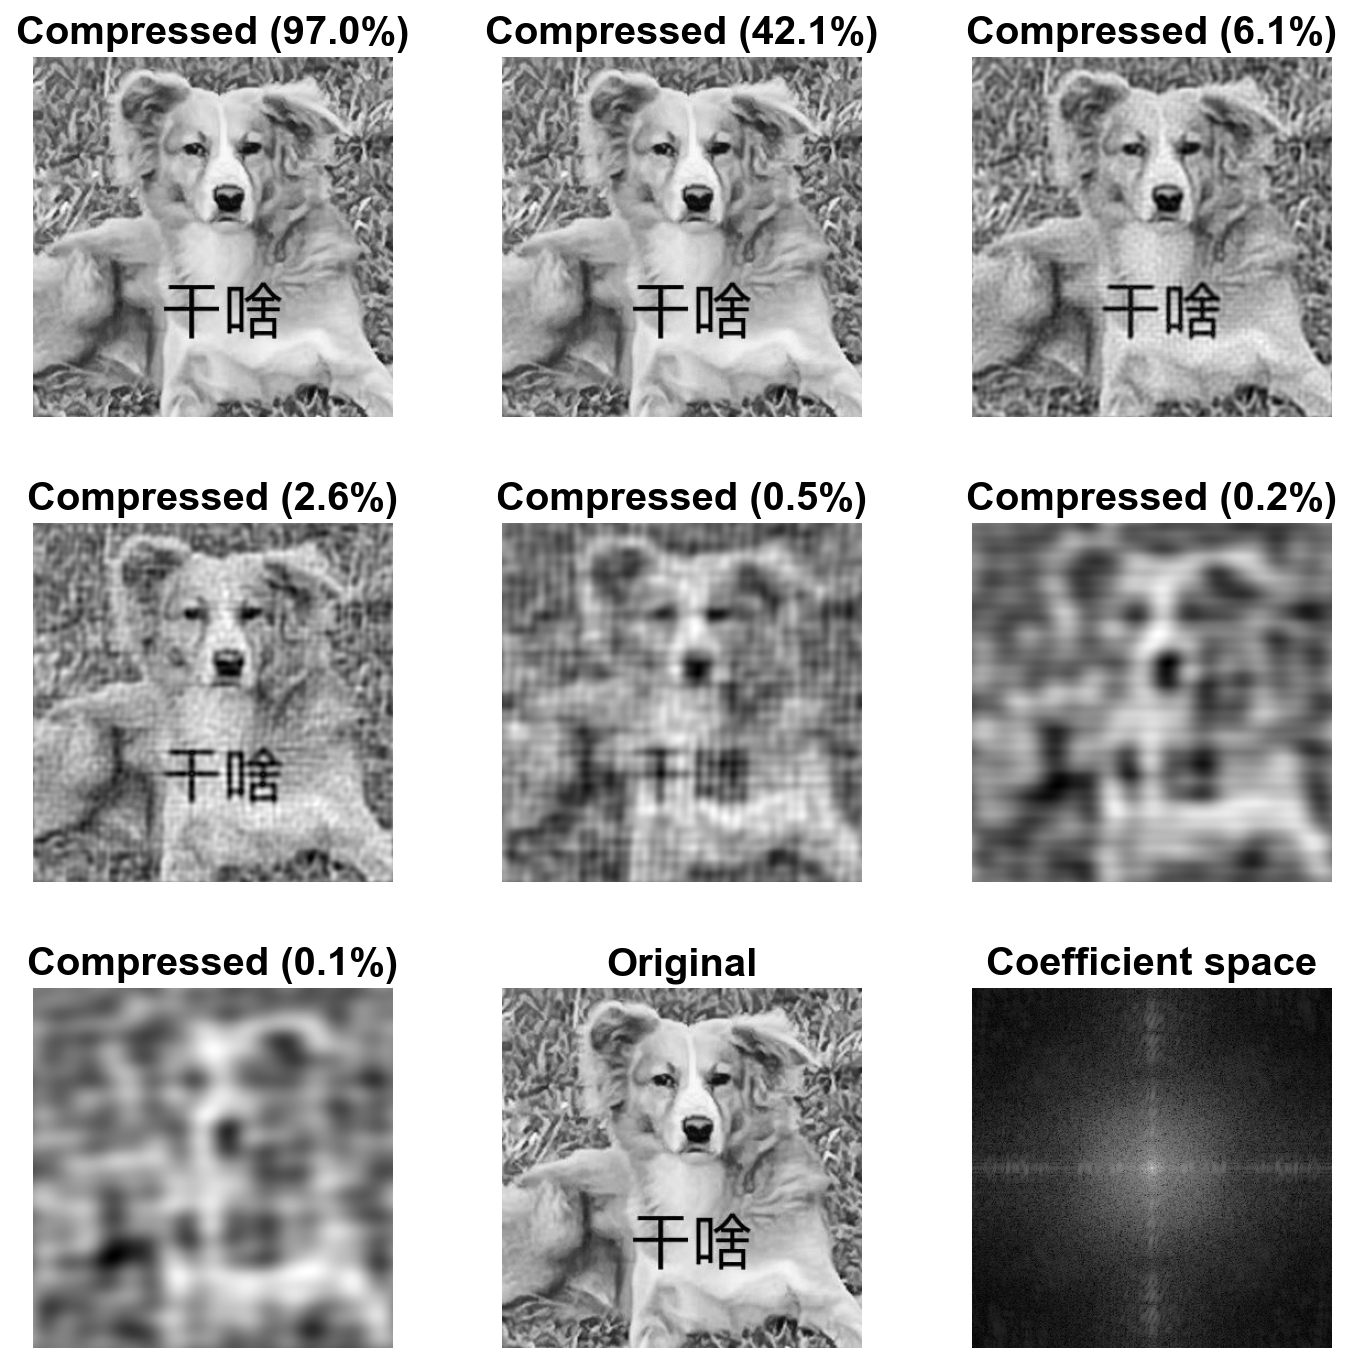

In [24]:
# plot comparison between threshold and original
row = 3
col = 3
thresholds = 1e-5 * np.array([1, 10, 100, 200, 500, 800, 1000])

# calculate and plot compressed img
fig, axs = plt.subplots(row, col, figsize=(9, 9))
for row_i in range(row):
    for col_i in range(col):
        i = row_i*col+ col_i
        threshold_mask = abs(gray_img_fft) > thresholds[i]*np.max(abs(gray_img_fft))
        gray_img_thr_fft = gray_img_fft * threshold_mask
        gray_img_thr = abs(np.fft.ifft2(gray_img_thr_fft))
        compression_rate = np.sum(threshold_mask) / (np.prod(gray_img.shape))
        axs[row_i, col_i].imshow(gray_img_thr, cmap='gray')
        axs[row_i, col_i].set_title(f'Compressed ({compression_rate*100 :.1f}%)')
        axs[row_i, col_i].axis('off')
        if i == (len(thresholds)-1):
            break
    if i == (len(thresholds)-1):
        break

# plot original img and coeff space
axs[2, 1].imshow(gray_img, cmap='gray')
axs[2, 1].set_title('Original')
axs[2, 1].axis('off')
axs[2, 2].imshow(coeff_space, cmap='gray')
axs[2, 2].set_title('Coefficient space')
axs[2, 2].axis('off')
        
plt.tight_layout()

### 3D intensity plot

In [25]:
from mpl_toolkits.mplot3d import Axes3D

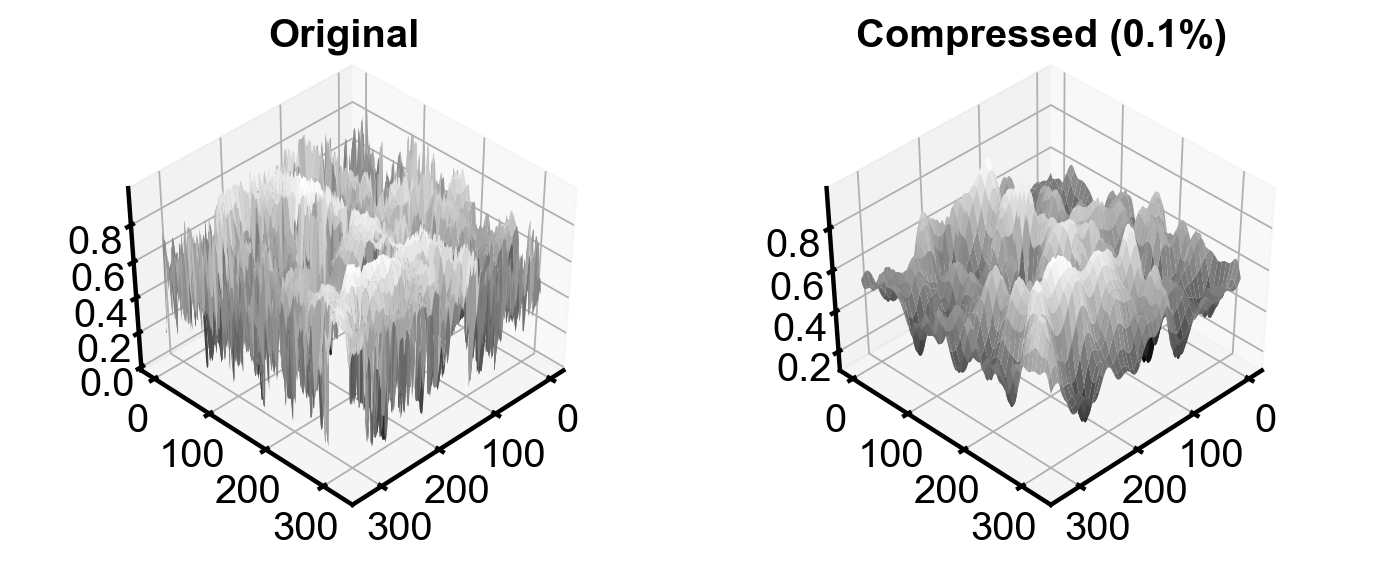

In [26]:
# plot 3d intensity plot
plt.rcParams.update({'xtick.labelsize': 18,})
fig, axs = plt.subplots(1, 2, figsize=(9, 4), subplot_kw={"projection": "3d"})
XX, YY = np.meshgrid(np.arange(gray_img.shape[0]), np.arange(gray_img.shape[1]))
axs[0].plot_surface(XX, YY, gray_img, cmap='gray')
axs[0].set_title('Original')
axs[0].view_init(45, 45)
axs[0].dist = 12  # zoom out to fit all labels in

axs[1].plot_surface(XX, YY, gray_img_thr, cmap='gray')
axs[1].set_title(f'Compressed ({compression_rate*100 :.1f}%)')
axs[1].view_init(45, 45)
axs[1].dist = 12  # zoom out to fit all labels in

plt.tight_layout()

The compressed image smoothens the peaks in the original image.